 <h1> HEIGHT AND WEIGHT DATASET</h1>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr


<h3>IMPORTING THE DATA</h3>

In [2]:
data=pd.read_csv("C:/Users/PRADEEP PRIYA/Downloads/weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
data.drop(['Gender'],axis=1,inplace=True)#

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  499 non-null    float64
 1   Weight  499 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
data.describe()

,Height,Weight
count,499.000000,499.000000
mean,68.865948,187.113038
std,2.701260,19.314468
min,60.748118,135.655876
25%,67.116512,173.013517
50%,68.766162,186.780338
75%,70.918840,199.917405
max,76.709835,241.893563


<h3>CHECKING NULL VALUES</h3>

In [6]:
data.isnull().sum()

Height    0
Weight    0
dtype: int64

<h3>SUBPLOT</h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x2e9fac20b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2e9fac2e1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e9fac207f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e9fac2e8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e9fac2ec70>],
 'means': []}

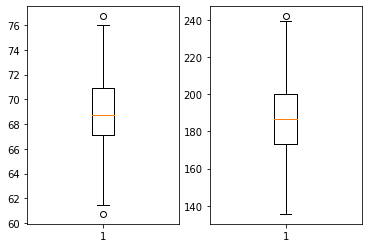

In [7]:
plt.subplot(1,2,1)
plt.boxplot(data['Height'])
plt.subplot(1,2,2)
plt.boxplot(data['Weight'])

<h3>SCATTER PLOT</h3>

<AxesSubplot:xlabel='Weight', ylabel='Height'>

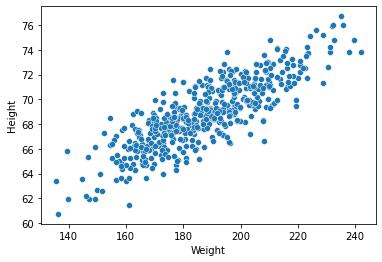

In [8]:
sns.scatterplot(x="Weight",y="Height",data=data)

In [9]:
data.shape

(499, 2)

In [10]:
pearsonr(data.Weight,data.Height)

(0.8378162260048672, 9.906781041686286e-133)

In [18]:
train=data.iloc[:400]
train


,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
395,69.216147,184.936690
396,68.015006,194.286946
397,61.926949,149.149685
398,67.266363,192.470770


In [20]:
train.shape

(400, 2)

In [19]:
test=data.iloc[400:]
test

,Height,Weight
400,69.970904,202.863293
401,65.313462,163.357331
402,71.906005,217.027715
403,66.233904,183.161233
404,65.814943,166.583610
...,...,...
494,69.606225,194.200712
495,72.881707,194.199509
496,62.178331,145.898842
497,68.874707,191.833709


In [21]:
test.shape

(99, 2)

In [22]:
train_x=train.Weight
train_y=train.Height
train_xc=sm.add_constant(train_x)
model=sm.OLS(train_y,train_xc).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     880.7
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          6.47e-103
Time:                        10:54:40   Log-Likelihood:                -728.97
No. Observations:                 400   AIC:                             1462.
Df Residuals:                     398   BIC:                             1470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.3927      0.726     65.255      0.000      45.965      48.821
Weight         0.1148      0.004     29.677      0.000       0.107       0.122
==============================================================================
Omnibus:                        2.257   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                2.330
Skew:                          -0.161   Prob(JB):                        0.312
Kurtosis:                       2.810   Cond. No.                     1.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
test_x=test.Weight
test_y=test.Height
test_xc=sm.add_constant(test_x)
predicted_y=model.predict(test_xc)



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:xlabel='Weight', ylabel='Height'>

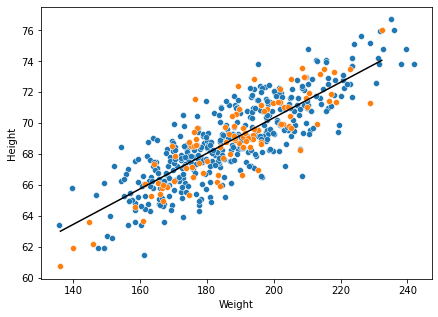

In [46]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=train.Weight,y=train.Height,data=data)
sns.scatterplot(x=test.Weight,y=test.Height,data=data)
sns.lineplot(x=test.Weight,y=predicted_y,data=data,color="black")